In [1]:
import os
import pandas as pd
import glob
%config Completer.use_jedi=False

In [2]:
for file in glob.glob("./cleaned_data/*/*"):
    df = pd.read_csv(file)
    if df.shape[0] > 50000 and df.shape[1] > 15:
        print(file, df.shape)

./cleaned_data/Punjab/Mandi Gobindgarh_site_255.csv (52584, 17)
./cleaned_data/Punjab/Ludhiana_site_253.csv (51864, 17)
./cleaned_data/Bihar/Muzaffarpur_site_158.csv (65736, 20)
./cleaned_data/Bihar/Patna_site_157.csv (94224, 18)
./cleaned_data/Rajasthan/Jodhpur_site_136.csv (64272, 19)
./cleaned_data/Rajasthan/Jaipur_site_134.csv (50400, 20)
./cleaned_data/Uttar Pradesh/Varanasi_site_273.csv (66154, 20)
./cleaned_data/Uttar Pradesh/Agra_site_307.csv (61096, 19)
./cleaned_data/Telangana/Hyderabad_site_262.csv (50400, 21)
./cleaned_data/Telangana/Hyderabad_site_275.csv (54115, 20)
./cleaned_data/Telangana/Hyderabad_site_199.csv (53328, 21)
./cleaned_data/Telangana/Hyderabad_site_294.csv (108096, 17)
./cleaned_data/Telangana/Hyderabad_site_251.csv (53328, 21)
./cleaned_data/Haryana/Faridabad_site_263.csv (96776, 19)
./cleaned_data/Haryana/Panchkula_site_161.csv (64272, 17)
./cleaned_data/Gujarat/Ahmedabad_site_308.csv (69610, 18)
./cleaned_data/Maharashtra/Chandrapur_site_271.csv (58972,

In [6]:
df.shape[0]

5394

In [32]:
selected_sites = ['./cleaned_data/Punjab/Ludhiana_site_253.csv', 
                  './cleaned_data/Bihar/Patna_site_157.csv', 
                  './cleaned_data/Rajasthan/Jaipur_site_134.csv', 
                  './cleaned_data/Uttar Pradesh/Varanasi_site_273.csv', 
                  './cleaned_data/Telangana/Hyderabad_site_199.csv', 
                  './cleaned_data/Haryana/Faridabad_site_263.csv', 
                  './cleaned_data/Gujarat/Ahmedabad_site_308.csv', 
                  './cleaned_data/Tamil Nadu/Chennai_site_288.csv', 
                  './cleaned_data/Delhi/Delhi_site_301.csv', 
                  './cleaned_data/Andhra Pradesh/Tirupati_site_258.csv']

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# from tqdm import tqdm

In [3]:
df_data = []
model_name = 'random_forest'
for site in (glob.glob("./cleaned_data/*/*")):
    try:
        data = pd.read_csv(site)

        print(site)
        state = site.split('/')[2]
        city = site.split('/')[3].split('_')[0]
        _id = '_'.join(site.split('/')[3].split('_')[1:])[:-4]

        # Define the features and target variables
        X = data.drop(['PM2.5 (ug/m3)', 'From Date', 'To Date'], axis=1)
        y = data['PM2.5 (ug/m3)']

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest regression model
        rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        rf.fit(X_train, y_train)

        # Evaluate the model on the test set
        y_pred = rf.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
    #     print(f'Mean squared error: {mse:.2f}')

        # Calculate RMSE and adjusted R square loss metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        r2 = r2_score(y_test, y_pred)
        n = len(X_test)
        p = X_test.shape[1]
        adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

        # Print the results
    #     print('RMSE: {:.2f}'.format(rmse))
    #     print('Adjusted R square: {:.2f}'.format(adj_r2))
        print(site)
        df_data.append([state,city,_id, model_name ,rmse, adj_r2])
    except:
        pass
#     break

./cleaned_data/Karnataka/Belgaum_site_5432.csv
./cleaned_data/Karnataka/Belgaum_site_5432.csv
./cleaned_data/Karnataka/Bengaluru_site_162.csv
./cleaned_data/Karnataka/Mangalore_site_5421.csv
./cleaned_data/Karnataka/Mangalore_site_5421.csv
./cleaned_data/Karnataka/Mysuru_site_5125.csv
./cleaned_data/Karnataka/Mysuru_site_5125.csv
./cleaned_data/Karnataka/Chikkamagaluru_site_5265.csv
./cleaned_data/Karnataka/Chikkamagaluru_site_5265.csv
./cleaned_data/Karnataka/Shivamogga_site_5266.csv
./cleaned_data/Karnataka/Shivamogga_site_5266.csv
./cleaned_data/Karnataka/Vijayapura_site_5267.csv
./cleaned_data/Karnataka/Vijayapura_site_5267.csv
./cleaned_data/Karnataka/Ramanagara_site_5255.csv
./cleaned_data/Karnataka/Ramanagara_site_5255.csv
./cleaned_data/Karnataka/Bengaluru_site_5686.csv
./cleaned_data/Karnataka/Bengaluru_site_5686.csv
./cleaned_data/Karnataka/Madikeri_site_5391.csv
./cleaned_data/Karnataka/Madikeri_site_5391.csv
./cleaned_data/Karnataka/Haveri_site_5420.csv
./cleaned_data/Karna

./cleaned_data/Rajasthan/Dholpur_site_5700.csv
./cleaned_data/Rajasthan/Rajsamand_site_5718.csv
./cleaned_data/Rajasthan/Rajsamand_site_5718.csv
./cleaned_data/Rajasthan/Jaipur_site_1393.csv
./cleaned_data/Rajasthan/Jaipur_site_1393.csv
./cleaned_data/Rajasthan/Jaipur_site_134.csv
./cleaned_data/Rajasthan/Jaipur_site_134.csv
./cleaned_data/Rajasthan/Jaipur_site_1396.csv
./cleaned_data/Rajasthan/Jaipur_site_1396.csv
./cleaned_data/Rajasthan/Udaipur_site_1397.csv
./cleaned_data/Rajasthan/Udaipur_site_1397.csv
./cleaned_data/Uttar Pradesh/Agra_site_5463.csv
./cleaned_data/Uttar Pradesh/Agra_site_5463.csv
./cleaned_data/Uttar Pradesh/Lucknow_site_297.csv
./cleaned_data/Uttar Pradesh/Lucknow_site_297.csv
./cleaned_data/Uttar Pradesh/Firozabad_site_5480.csv
./cleaned_data/Uttar Pradesh/Firozabad_site_5480.csv
./cleaned_data/Uttar Pradesh/Varanasi_site_5469.csv
./cleaned_data/Uttar Pradesh/Varanasi_site_5469.csv
./cleaned_data/Uttar Pradesh/Ghaziabad_site_5081.csv
./cleaned_data/Uttar Pradesh

./cleaned_data/Haryana/Palwal _site_5050.csv
./cleaned_data/Haryana/Ambala_site_5052.csv
./cleaned_data/Haryana/Ambala_site_5052.csv
./cleaned_data/Haryana/Gurugram_site_5344.csv
./cleaned_data/Haryana/Gurugram_site_5344.csv
./cleaned_data/Haryana/Kurukshetra _site_5043.csv
./cleaned_data/Haryana/Kurukshetra _site_5043.csv
./cleaned_data/Haryana/Gurugram_site_146.csv
./cleaned_data/Haryana/Gurugram_site_5345.csv
./cleaned_data/Haryana/Gurugram_site_5345.csv
./cleaned_data/Haryana/Panchkula_site_161.csv
./cleaned_data/Haryana/Panchkula_site_161.csv
./cleaned_data/Haryana/Charkhi Dadri_site_5339.csv
./cleaned_data/Haryana/Charkhi Dadri_site_5339.csv
./cleaned_data/Haryana/Panipat_site_5048.csv
./cleaned_data/Haryana/Panipat_site_5048.csv
./cleaned_data/Haryana/Faridabad_site_5341.csv
./cleaned_data/Haryana/Faridabad_site_5341.csv
./cleaned_data/Haryana/Fatehabad_site_5054.csv
./cleaned_data/Haryana/Fatehabad_site_5054.csv
./cleaned_data/Haryana/Mandikhera_site_5055.csv
./cleaned_data/Har

./cleaned_data/Madhya Pradesh/Pithampur_site_1402.csv
./cleaned_data/Madhya Pradesh/Gwalior_site_5667.csv
./cleaned_data/Madhya Pradesh/Gwalior_site_5667.csv
./cleaned_data/Madhya Pradesh/Bhopal_site_5650.csv
./cleaned_data/Madhya Pradesh/Bhopal_site_5650.csv
./cleaned_data/Madhya Pradesh/Katni_site_5250.csv
./cleaned_data/Madhya Pradesh/Katni_site_5250.csv
./cleaned_data/Madhya Pradesh/Gwalior_site_5273.csv
./cleaned_data/Madhya Pradesh/Gwalior_site_5273.csv
./cleaned_data/Madhya Pradesh/Indore_site_5248.csv
./cleaned_data/Madhya Pradesh/Indore_site_5248.csv
./cleaned_data/Madhya Pradesh/Bhopal_site_5247.csv
./cleaned_data/Madhya Pradesh/Bhopal_site_5247.csv
./cleaned_data/Madhya Pradesh/Mandideep_site_1403.csv
./cleaned_data/Madhya Pradesh/Mandideep_site_1403.csv
./cleaned_data/Madhya Pradesh/Jabalpur_site_5249.csv
./cleaned_data/Madhya Pradesh/Jabalpur_site_5249.csv
./cleaned_data/Madhya Pradesh/Bhopal_site_5708.csv
./cleaned_data/Madhya Pradesh/Bhopal_site_5708.csv
./cleaned_data/K

In [4]:
stats_df = pd.DataFrame(df_data, columns=['state', 'city', 'site_id','model_name' ,'rmse', 'adj_r2'])
stats_df

,state,city,site_id,model_name,rmse,adj_r2
0,Karnataka,Belgaum,site_5432,random_forest,11.655271,0.861154
1,Karnataka,Mangalore,site_5421,random_forest,10.131116,0.764493
2,Karnataka,Mysuru,site_5125,random_forest,4.653304,0.816695
3,Karnataka,Chikkamagaluru,site_5265,random_forest,6.259855,0.767928
4,Karnataka,Shivamogga,site_5266,random_forest,9.126933,0.726576
...,...,...,...,...,...,...
320,Delhi,Delhi,site_1422,random_forest,32.462531,0.885545
321,Delhi,Delhi,site_1420,random_forest,25.757953,0.942113
322,Delhi,Delhi,site_1431,random_forest,27.221277,0.930812
323,Delhi,Delhi,site_1424,random_forest,22.282997,0.942427


In [79]:
pd.options.display.max_rows=None
stats_df.sort_values(by=['adj_r2'],ascending=False)

,state,city,site_id,rmse,adj_r2
236,Tamil Nadu,Hosur,site_5612,0.243400,0.999905
231,Maharashtra,Mumbai,site_5403,3.473261,0.989506
220,Maharashtra,Mumbai,site_5397,3.936919,0.985402
229,Maharashtra,Mumbai,site_5396,5.792148,0.983876
131,Uttar Pradesh,Agra,site_5464,9.028320,0.979309
117,Uttar Pradesh,Moradabad,site_5554,8.859044,0.977882
187,Gujarat,Gandhinagar,site_5457,7.673231,0.976273
110,Uttar Pradesh,Gorakhpur,site_5472,8.619887,0.974276
111,Uttar Pradesh,Prayagraj,site_5459,8.715956,0.966558
115,Uttar Pradesh,Vrindavan,site_5483,14.954372,0.964568


In [5]:
stats_df.to_csv("./feature_engineering_random_forest.csv", header=True, index=False)

In [3]:
data = pd.read_csv('./cleaned_data/Delhi/Delhi_site_115.csv')

In [6]:
# Define the features and target variables
X = data.drop(['PM2.5 (ug/m3)', 'From Date', 'To Date'], axis=1)
y = data['PM2.5 (ug/m3)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')

# Calculate RMSE and adjusted R square loss metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Print the results
print('RMSE: {:.2f}'.format(rmse))
print('Adjusted R square: {:.2f}'.format(adj_r2))


Mean squared error: 1582.49
RMSE: 39.78
Adjusted R square: 0.71


In [24]:
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameters to tune
# param_grid = {
#     'n_estimators': [50, 100, 150, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', 'auto']
# }

# # Create a random forest model
# rf = RandomForestRegressor()

# # Create a grid search object with the defined hyperparameters
# grid_search = GridSearchCV(rf, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# # Fit the grid search object to the data
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters and the corresponding score
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: -688.1866859139396


In [25]:
best_params = grid_search.best_params_

In [40]:
# # Train a random forest regression model
# rf = RandomForestRegressor(random_state=42, **best_params)
# rf.fit(X_train, y_train)

# # Evaluate the model on the test set
# y_pred = rf.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean squared error: {mse:.2f}')

# # Calculate RMSE and adjusted R square loss metrics
# mse = mean_squared_error(y_test, y_pred)
# rmse = mse ** 0.5
# r2 = r2_score(y_test, y_pred)
# n = len(X_test)
# p = X_test.shape[1]
# adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# # Print the results
# print('RMSE: {:.2f}'.format(rmse))
# print('Adjusted R square: {:.2f}'.format(adj_r2))

Mean squared error: 68.03
RMSE: 8.25
Adjusted R square: 0.89


In [23]:
# import matplotlib.pyplot as plt

# # Train the random forest model
# # ...

# # Get feature importances
# importances = rf.feature_importances_

# # Get feature names
# features = X_train.columns

# # Create a dataframe of feature importances and sort by importance
# feature_importances = pd.DataFrame({'feature': features, 'importance': importances})
# feature_importances = feature_importances.sort_values('importance', ascending=False)

# # Plot feature importances
# plt.barh(feature_importances['feature'], feature_importances['importance'])
# plt.title('Feature Importances')
# plt.xlabel('Importance')
# plt.show()

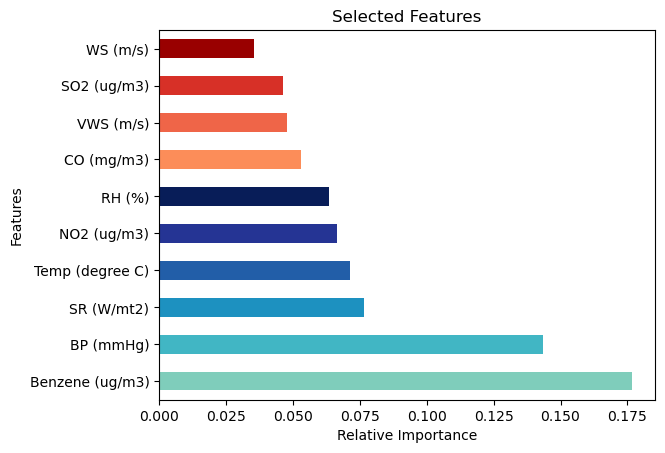

In [10]:
import matplotlib.pyplot as plt

# plot feature importances
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh', color=['#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494','#081d58','#fc8d59','#ef6548','#d73027','#990000'])

# customize plot
plt.title('Selected Features')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

In [38]:
(X_train.columns)

Index(['PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)',
       'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)',
       'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)',
       'SR (W/mt2)', 'BP (mmHg)', 'Xylene (ug/m3)', 'AT (degree C)'],
      dtype='object')